<a href="https://colab.research.google.com/github/saubhagyav/Book_Recommendation_System/blob/main/Individual_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

In [1]:
# Importing Libraries:- 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Paths of the datasets provided to me.
user = '/content/drive/MyDrive/Alma Better/Capstone Projects/Book_Recommendation_System-Saubhagya_Verma/Copy of Users.csv'
books = '/content/drive/MyDrive/Alma Better/Capstone Projects/Book_Recommendation_System-Saubhagya_Verma/Copy of Books.csv'
ratings = '/content/drive/MyDrive/Alma Better/Capstone Projects/Book_Recommendation_System-Saubhagya_Verma/Copy of Ratings.csv'

In [4]:
df_user = pd.read_csv(user)
df_books = pd.read_csv(books)
df_ratings = pd.read_csv(ratings)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **Informations about the 3 datasets provided to us for this project:-**
## The Book-Crossing dataset comprises 3 files.

## **1. Users** 

### Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

## **2. Books**

### Books are identified by their respective ISBN. Invalid ISBNs have already been removedfrom the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

## **3. Ratings**

### Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [5]:
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
df_user.shape

(278858, 3)

In [7]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
df_books.shape

(271360, 8)

In [9]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
df_ratings.shape

(1149780, 3)

# **Combining the book-title and book-author feature to form new-title for the books:-**

In [11]:
df_books['Book-Author'].fillna('Unknown',inplace=True)

In [12]:
# Define a function to combine to columns namely title and author
def change_title(str1,str2):
  '''Change the title of books'''
  str1 = str1 +" "+'by' +" "+str2
  return str1

In [13]:
# Create a new column for title
df_books['new_title'] = df_books.apply(lambda x : change_title(x['Book-Title'],x['Book-Author']),axis = 1)

In [14]:
# Get rid of duplications
df_books = df_books.drop_duplicates(subset='new_title',keep='first')

In [15]:
df_books.shape

(251185, 9)

# **Calculating the number of null values in the three Datasets:-**

In [16]:
df_user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [17]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
new_title              0
dtype: int64

In [18]:
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

# **EDA on the Three Datasets:-** 

In [19]:
df_ratings['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The Ratings')

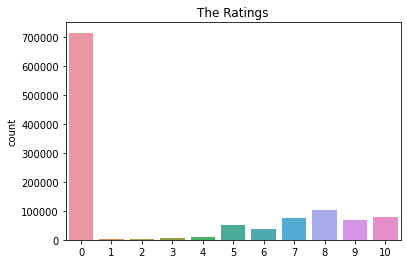

In [20]:
sns.countplot(df_ratings['Book-Rating'].values).set_title('The Ratings')

# **Forming the Final Dataset by merging the above three Datasets:-** 

In [21]:
df_new = pd.merge(df_user, df_ratings, how='inner', on='User-ID')
df_new.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [22]:
df_new.shape

(1149780, 5)

In [23]:
df_new = df_new.merge(df_books, on='ISBN')
df_new.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,new_title
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Classical Mythology by Mark P. O. Morford
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright


# **Removing Unwanted Values from the Dataset:-**

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916933 entries, 0 to 916932
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              916933 non-null  int64  
 1   Location             916933 non-null  object 
 2   Age                  671659 non-null  float64
 3   ISBN                 916933 non-null  object 
 4   Book-Rating          916933 non-null  int64  
 5   Book-Title           916933 non-null  object 
 6   Book-Author          916933 non-null  object 
 7   Year-Of-Publication  916933 non-null  object 
 8   Publisher            916931 non-null  object 
 9   Image-URL-S          916933 non-null  object 
 10  Image-URL-M          916933 non-null  object 
 11  Image-URL-L          916929 non-null  object 
 12  new_title            916933 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 97.9+ MB


### **Here the Year-Of-Publication is in object Dtype, it should ideally be in  numeric Dtype. Let us explore this feature a bit more.**

## 1. **Cleaning the Feature - Year of Publication:-**

In [25]:
# Visually inspecting this feature by observing it's unique values.
df_new['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1987, 1989, 1992, 1983, 1979, 1995, 1982, 1985, 1986,
       1978, 1980, 1952, 1990, 1981, 0, 1984, 1968, 1961, 1959, 1946,
       1974, 1958, 1976, 1971, 1977, 1975, 1965, 1941, 1970, '1996',
       '1999', 1972, '1992', '2001', 1953, 1962, 1973, '2004', 1960,
       '1997', '2000', '0', '2002', 1954, '1989', 1966, 1920, '1998',
       '2003', 1967, 1956, 1942, 1955, 1951, 1969, 1948, '1977', '1990',
       '1986', '1994', '1982', 1963, 1964, '1995', '1959', '1988', 1950,
       '1991', '1984', 2005, 1943, '1993', '1987', '1983', '1981', 1957,
       '1972', '1980', 1937, 1940, '1965', '1970', '1979', 1930, 1923,
       1945, 1947, '1976', 1936, '1985', '1978', 1925, '1966', '1958',
       '1975', '1973', 1927, '1974', '1967', '1971', '1969', 2030, '1968',
       2011, '1960', '1964', 2020, 1939, 1926, 1938, '1961', 1911, 1904,
       1949, 1932, 1929, '1953', '1963', '1955', '1944', '1920', '1

# **Observation:-** We can clearly see that their are some noice values in the Year of Publication features :-
### 1. **String Noice Values -** such as 'DK Publishing Inc' and 'Gallimard.
### 2. **Integer Noice Values -** Since this data was collected in august 2004, so any year value greater than 2004 is a noice value.

In [26]:
# Casting Year-Of-Publication to numeric datatype and removing all String Noice Values using coerce functionality.

df_new['Year-Of-Publication'] = pd.to_numeric(df_new['Year-Of-Publication'], 'coerce')

In [27]:
# Cross checking the column to check if the string based noice values are removed or not.
df_new['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1987., 1989., 1992., 1983., 1979.,
       1995., 1982., 1985., 1986., 1978., 1980., 1952., 1990., 1981.,
          0., 1984., 1968., 1961., 1959., 1946., 1974., 1958., 1976.,
       1971., 1977., 1975., 1965., 1941., 1970., 1972., 1953., 1962.,
       1973., 1960., 1954., 1966., 1920., 1967., 1956., 1942., 1955.,
       1951., 1969., 1948., 1963., 1964., 1950., 2005., 1943., 1957.,
       1937., 1940., 1930., 1923., 1945., 1947., 1936., 1925., 1927.,
       2030., 2011., 2020., 1939., 1926., 1938., 1911., 1904., 1949.,
       1932., 1929., 1944., 1933., 1922., 1897., 2050., 1902., 1921.,
       1900., 2038., 1928., 2006., 1901., 2026., 1931., 1378., 1908.,
         nan, 1909., 1924., 2012., 2008., 1935., 1376., 2037., 1906.,
       1806., 1917., 1919., 1914., 1934., 2024.])

In [28]:
# Removing all the integer Noice Values from the Dataset.
df_new = df_new[(df_new['Year-Of-Publication']<=2004) & (df_new['Year-Of-Publication']!= 0)]
df_new.head(2)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,new_title
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Classical Mythology by Mark P. O. Morford
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright


In [29]:
df_new['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1987., 1989., 1992., 1983., 1979.,
       1995., 1982., 1985., 1986., 1978., 1980., 1952., 1990., 1981.,
       1984., 1968., 1961., 1959., 1946., 1974., 1958., 1976., 1971.,
       1977., 1975., 1965., 1941., 1970., 1972., 1953., 1962., 1973.,
       1960., 1954., 1966., 1920., 1967., 1956., 1942., 1955., 1951.,
       1969., 1948., 1963., 1964., 1950., 1943., 1957., 1937., 1940.,
       1930., 1923., 1945., 1947., 1936., 1925., 1927., 1939., 1926.,
       1938., 1911., 1904., 1949., 1932., 1929., 1944., 1933., 1922.,
       1897., 1902., 1921., 1900., 1928., 1901., 1931., 1378., 1908.,
       1909., 1924., 1935., 1376., 1906., 1806., 1917., 1919., 1914.,
       1934.])

In [30]:
# The percentage of Data lost while cleaning the Year-of_publication Feature.
percentage_of_data_lost = (1031136 - df_new.shape[0])*100/1031136
percentage_of_data_lost

12.293334729851349

# **Therefore, after cleaning the dataset based upon Year-Of-Publication Feature, we lost only a miniscule amount of 1.3% data.**

## **2. Cleaning the Feature - Book Rating :-**

## **Reasons for Eliminating the zero Rating:-** 

### 1. Since zero is not explicitly defined by users for rating the books, it doesn't provide much info regarding the user satisfaction from the book.

### 2. In real life aswell, most of the books sold on amazon don't get rated by the users and it's evident from the count of zero ratings in the count plot.

### **We need data to make recommendations to users only when we have effective insights about them.**

In [31]:
# Size of dataset rows before the cleaing operation.
df_before_size = df_new.shape[0]
df_before_size

904375

In [32]:
# Removing all the implicit values as they aren't explicitly refered to as ratings.
df_new = df_new[df_new['Book-Rating']>0]

# Size of dataset rows after the cleaing operation.
df_after_size = df_new.shape[0]
df_after_size

334826

In [33]:
# Percentage of Data lost while cleaning the Book Rating Feature.
percentage_of_0_data_lost = (df_before_size- df_after_size)*100/df_before_size
percentage_of_0_data_lost

62.977083621285416

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The Ratings')

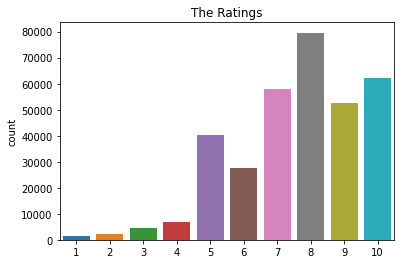

In [34]:
# Visualizing the Book Ratings after removing the implicit value '0':-
sns.countplot(df_new['Book-Rating'].values).set_title('The Ratings')

# **Therefore, after cleaning the dataset based upon Book-Rating Feature, we lost a large amount of our data. We lost almost 63% of values from our dataset.**

## **3. Cleaning the Feature - Age :-**

In [35]:
# Size of dataset rows before the cleaing operation.
df_size_before_removing_age_outliers = df_new.shape[0]
df_size_before_removing_age_outliers

334826

In [36]:
# Setting Age Threshold as 90 years as any person beyond this age won't have the mental capacity to properly review a book.
df_new['Age'] = np.where(df_new['Age']>90, None, df_new['Age'])
df_new[df_new['Age'].isna()].shape[0]
df_new = df_new[~df_new['Age'].isna()]
df_new.head(2)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,new_title
5,67544,"toronto, ontario, canada",30,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright
13,219008,"halifax, nova scotia, canada",60,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright


In [37]:
# Size of dataset rows after the cleaing operation.
df_size_after_removing_age_outliers = df_new.shape[0]
df_size_after_removing_age_outliers

235206

In [38]:
# Percentage of Data lost while cleaning the Age Feature.
percentage_of_data_lost_after_removing_age_outliers = (df_size_before_removing_age_outliers- df_size_after_removing_age_outliers)*100/df_size_before_removing_age_outliers
percentage_of_data_lost_after_removing_age_outliers

29.752767108886406

## **Therefore, after removing the outlers from the age column, we are left with around 2.6 lakh rows of data. We lost nearly 30% of the values during this operation.**


## **Let us have a look at the null values left in the dataeset.**

In [39]:
# Checking the null values in the dataset:-
df_new.isnull().sum()

User-ID                0
Location               0
Age                    0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
new_title              0
dtype: int64

In [40]:
# Removing the 3 null values from the dataset to get the final cleaned Dataset:- 
df_new.dropna(inplace=True)

# Re-checking the number of null values in the dataset:-
df_new.isnull().sum()

User-ID                0
Location               0
Age                    0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
new_title              0
dtype: int64

# **Defining the Optimum Book reader**:-

### We can't take every user's rating at facevalue because if the user is a novice reader with only an experience of reading a couple of books, his/her ratings might not be much relevant for finding similarity among books.

### **Therefore as a general rule of thumb we choosing only those User's who have rated atleast 15 Books for builing the recommendation system.**

In [41]:
# Size of dataset rows before the User selection operation.
df_size_before_removing_Novice_readers = df_new.shape[0]
df_size_before_removing_Novice_readers

235204

In [42]:
# Storing the value counts of User-ID's in a new variable named counts1
counts1 = df_new['User-ID'].value_counts()

# Removing the User-ID's which have rated less than 10 books.
df1= df_new[df_new['User-ID'].isin(counts1[counts1 >= 15].index)].reset_index()
df1.drop(columns='index', inplace=True)

In [43]:
# Size of dataset rows after the User selection operation.
df_size_after_removing_Novice_readers = df1.shape[0]
df_size_after_removing_Novice_readers

150349

In [44]:
# Percentage of Data lost while removing the noice readers.
percentage_of_data_lost_after_removing_Novice_readers = (df_size_before_removing_Novice_readers - df_size_after_removing_Novice_readers)*100/df_size_before_removing_Novice_readers
percentage_of_data_lost_after_removing_Novice_readers

36.0771925647523

In [45]:
df1.shape

(150349, 13)

# **Adding a new feature average Rating in the dataset:-**

In [46]:
# Calculating the rating count and mean rating given to each book by the user.

rating_count = df1.groupby('Book-Title')['Book-Rating'].count().to_frame()
rating_mean = df1.groupby('Book-Title')['Book-Rating'].mean().to_frame()

In [47]:
# Renaming the column names before merging them with the final dataset.

rating_count.rename(columns={'Book-Rating':'Rating-Count'}, inplace=True)
rating_mean.rename(columns={'Book-Rating':'Rating-Mean'}, inplace=True)

In [48]:
df1 = pd.merge(df1, rating_count, on='Book-Title', how='inner')
df1 = pd.merge(df1, rating_mean, on='Book-Title', how='inner')

In [49]:
df1.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,new_title,Rating-Count,Rating-Mean
0,219008,"halifax, nova scotia, canada",60,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright,2,6.500000
1,263325,"fredericton, new brunswick, canada",27,0002005018,6,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright,2,6.500000
2,35704,"kansas city, missouri, usa",53,0374157065,6,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,Flu: The Story of the Great Influenza Pandemic...,3,8.333333
3,110912,"milpitas, california, usa",36,0374157065,10,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,Flu: The Story of the Great Influenza Pandemic...,3,8.333333
4,197659,"indiana, pennsylvania, usa",49,0374157065,9,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,Flu: The Story of the Great Influenza Pandemic...,3,8.333333


In [50]:
# rounding off the rating mean feature to 2 decimal points
df1['Rating-Mean'] = df1['Rating-Mean'].round(2)

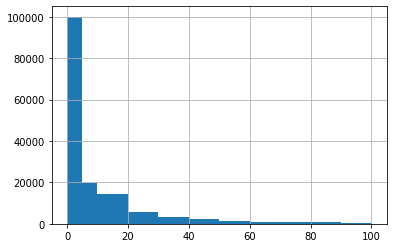

In [51]:
# Visualizing the rating counts of the users. 
df1['Rating-Count'].hist(bins=[0,5,10,20,30,40,50,60,70,80,90,100])

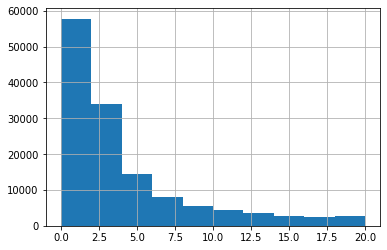

In [52]:
# Visualizing the rating counts of the users in the range between 0 to 20. 
df1['Rating-Count'].hist(bins=[0,2,4,6,8,10,12,14,16,18,20])

## **From this visualization it is evident that most users have rated between 2 to 5 books at most.**

## **Using IMDB Formula to calculate the Weighted Rating for our books**

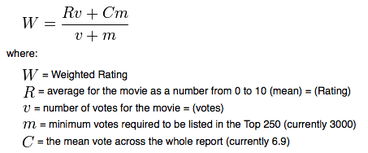

In [53]:
# Calculating the mean vote across the whole df
C = df1['Rating-Mean'].mean()
C

7.874466009085527

In [54]:
rating_count.describe()

,Rating-Count
count,79437.000000
mean,1.892682
std,3.533939
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,210.000000


In [55]:
# Calculating the minimum votes required to be listed in the top 5%
m = rating_count.quantile(.95)[0]
m

5.0

In [56]:
# IMDB formula; source: https://tutorialedge.net/python/building-imdb-top-250-clone-pandas/
def weighted_rating(x, m=m, C=C):
    v = x['Rating-Count']
    R = x['Rating-Mean']

    return (v/(v+m) * R) + (m/(m+v) * C)

In [57]:
# Create relevant sub-dataset
df_top_10 = df1.copy().loc[df1['Rating-Count'] >= m]
df_top_10.shape

(50356, 15)

In [58]:
df_top_10['Score'] = df_top_10.apply(weighted_rating, axis=1)

In [59]:
df_top_10.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,new_title,Rating-Count,Rating-Mean,Score
11,7346,"sunnyvale, california, usa",49,0440234743,9,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,The Testament by John Grisham,46,7.78,7.789261
12,11224,"tumwater, washington, usa",51,0440234743,6,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,The Testament by John Grisham,46,7.78,7.789261
13,13552,"cordova, tennessee, usa",32,0440234743,8,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,The Testament by John Grisham,46,7.78,7.789261
14,23511,"chapel hill, north carolina, usa",56,0440234743,8,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,The Testament by John Grisham,46,7.78,7.789261
15,31315,"henryville, indiana, usa",34,0440234743,10,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,The Testament by John Grisham,46,7.78,7.789261


# **Some Simple Recommendation Systems:-**

## **Recommendations Based upon Top 10 Highest Rated Books**

In [60]:
top_rated = df_top_10[['new_title', 'Score']]
top_rated = top_rated.groupby(['new_title'])['Score'].mean().to_frame()
top_rated.sort_values(by='Score', ascending=False).head(10)

,Score
new_title,
Harry Potter and the Chamber of Secrets Postcard Book by J. K. Rowling,9.377833
Harry Potter and the Goblet of Fire (Book 4) by J. K. Rowling,9.365623
"The Two Towers (The Lord of the Rings, Part 2) by J. R. R. Tolkien",9.352577
"The Two Towers (The Lord of the Rings, Part 2) by J.R.R. TOLKIEN",9.352577
"The Return of the King (The Lord of the Rings, Part 3) by J.R.R. TOLKIEN",9.283447
"The Return of the King (The Lord of the Rings, Part 3) by J. R. R. Tolkien",9.283447
Dilbert: A Book of Postcards by Scott Adams,9.224822
Harry Potter and the Prisoner of Azkaban (Book 3) by J. K. Rowling,9.212223
"Old Possum's Book of Practical Cats, Illustrated Edition by T.S. Eliot",9.182487


## **Recommendations Based upon Top 10 Most Rated Books by the Users**

In [61]:
top_popular_Books = df_top_10[['new_title', 'Score']]
top_popular_Books = top_popular_Books.groupby(['new_title'])['Score'].mean().to_frame()
top_popular_Books.sort_values(by='Score', ascending=False).head(10)#.plot(kind='barh')

,Score
new_title,
Harry Potter and the Chamber of Secrets Postcard Book by J. K. Rowling,9.377833
Harry Potter and the Goblet of Fire (Book 4) by J. K. Rowling,9.365623
"The Two Towers (The Lord of the Rings, Part 2) by J. R. R. Tolkien",9.352577
"The Two Towers (The Lord of the Rings, Part 2) by J.R.R. TOLKIEN",9.352577
"The Return of the King (The Lord of the Rings, Part 3) by J.R.R. TOLKIEN",9.283447
"The Return of the King (The Lord of the Rings, Part 3) by J. R. R. Tolkien",9.283447
Dilbert: A Book of Postcards by Scott Adams,9.224822
Harry Potter and the Prisoner of Azkaban (Book 3) by J. K. Rowling,9.212223
"Old Possum's Book of Practical Cats, Illustrated Edition by T.S. Eliot",9.182487


## **Recommending Books Based Upon Publishers:-**

In [62]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [63]:
# Recommending Books Based Upon Publishers:-
@interact
def recommend_books_based_upon_publishers( publishers = list(df_top_10['Publisher'].value_counts().index)):
  a = df_top_10[df_top_10['Publisher']==publishers][['Book-Title', 'Rating-Mean']]
  a = a.groupby(['Book-Title'])['Rating-Mean'].mean().to_frame()
  a = a.sort_values(by = 'Rating-Mean', ascending=False)
  return a.head(10)


interactive(children=(Dropdown(description='publishers', options=('Ballantine Books', 'Pocket', 'Bantam', 'Ber…

# By using the above drop down window, you can see the books from each publishing house that lie in the top 10 % based upon the Imdb criteria that was shown above.

# **Recommending Books Based Upon Author's:-**

In [64]:
# Recommending Books Based Upon Author's:-
@interact
def recommend_books_based_upon_authors( authors = list(df_top_10['Book-Author'].value_counts().index)):
  a = df_top_10[df_top_10['Book-Author']==authors][['Book-Title', 'Rating-Mean']]
  a = a.groupby(['Book-Title'])['Rating-Mean'].mean().to_frame()
  a = a.sort_values(by = 'Rating-Mean', ascending=False)
  return a.head(10)


interactive(children=(Dropdown(description='authors', options=('Nora Roberts', 'Stephen King', 'J. K. Rowling'…

# **Recommending Books Based Upon Year of Publication:-**

In [65]:
# Recommending Books Based Upon Author's:-
@interact
def recommend_books_based_upon_year( year = list(df_top_10['Year-Of-Publication'].value_counts().index)):
  a = df_top_10[df_top_10['Year-Of-Publication']==year][['Book-Title', 'Rating-Mean']]
  a = a.groupby(['Book-Title'])['Rating-Mean'].mean().to_frame()
  a = a.sort_values(by = 'Rating-Mean', ascending=False)
  return a.head(10)

interactive(children=(Dropdown(description='year', options=(2002.0, 2003.0, 2001.0, 1999.0, 2000.0, 1996.0, 19…

# **Now Let us Build a Nearest Neighbour Model Based Recommendation System:-**

In [66]:
df_Knn = df1.copy()

In [67]:
df_Knn['Score'] = df1.apply(weighted_rating, axis=1)

In [68]:
df_Knn.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,new_title,Rating-Count,Rating-Mean,Score
0,219008,"halifax, nova scotia, canada",60,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright,2,6.50,7.481761
1,263325,"fredericton, new brunswick, canada",27,0002005018,6,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright,2,6.50,7.481761
2,35704,"kansas city, missouri, usa",53,0374157065,6,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,Flu: The Story of the Great Influenza Pandemic...,3,8.33,8.045291
3,110912,"milpitas, california, usa",36,0374157065,10,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,Flu: The Story of the Great Influenza Pandemic...,3,8.33,8.045291
4,197659,"indiana, pennsylvania, usa",49,0374157065,9,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,Flu: The Story of the Great Influenza Pandemic...,3,8.33,8.045291


In [69]:
# Calculating the total number of books in the dataset and the number of books used in the recommendation system.

Number_of_books_in_dataset = len(df_books['Book-Title'].unique())
Number_of_books_considered_for_recommendation = len(df_Knn['Book-Title'].unique())

In [70]:
# Percentage of books considered for recommendation.

per_books_in_recommendation_system = (Number_of_books_considered_for_recommendation*100)/Number_of_books_in_dataset
per_books_in_recommendation_system

32.80690523881306

In [71]:
# Building the Final dataframe for the KNN Model.
df_final = pd.pivot_table(data=df_Knn, index='new_title', columns='User-ID', values='Score').fillna(0)

In [72]:
df_final.shape

(81233, 2943)

In [73]:
# Visualizing the sparse matrix formed with Book-Title as rows and User-Id's as columns
df_final.head(3)

User-ID,242,254,388,638,643,651,709,741,805,882,929,1025,1131,1211,1435,1585,1674,1733,1848,1903,2024,2030,2033,2179,2276,2313,2337,2358,2363,2766,2977,3145,3167,3282,3346,3363,3371,3373,3538,3556,...,274301,274308,274325,274466,274634,274656,274808,275111,275220,275383,275922,275970,276038,276050,276165,276307,276463,276487,276521,276538,276579,276641,276670,276680,276847,276929,276964,277157,277203,277427,277478,277523,277639,277929,278026,278137,278188,278221,278356,278843
new_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Ask Lily (Young Women of Faith: Lily Series, Book 5) by Nancy N. Rue",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dark Justice by Jack Higgins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth by Elizabeth Roberts",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
# converting the sparse matrix into condensed matrix using scipy.sparse functionality.
from scipy.sparse import csr_matrix

df_matrix = csr_matrix(df_final.values)

In [75]:
# # Building a KNN model with Cosine Similarity as the target metric for calculating the distances.

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors=5)
model_knn.fit(df_final)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [76]:
# Building item to item recommendation model for the book readers
def recommend(movie, n_values=11):
  distances, indices = model_knn.kneighbors(df_final.loc[movie,:].values.reshape(1, -1), n_neighbors = n_values)
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f'The Top {n_values - 1} Recommendations for Users who have read book {movie} are shown below:-')
    else:
        print('{0}: {1}, with distance of {2}.'.format(i, df_final.index[indices.flatten()[i]], distances.flatten()[i]))

In [77]:
recommend('Clara Callan by Richard Bruce Wright')

The Top 10 Recommendations for Users who have read book Clara Callan by Richard Bruce Wright are shown below:-
1: Flying in to Love (Robert Stewart Book) by D. M. Thomas, with distance of 0.2928932188134524.
2: The Dominion of Wyley McFadden by Scott Gardiner, with distance of 0.2928932188134524.
3: First blast of the trumpet against the monstrous regiment of women by Eric P McCormack, with distance of 0.2928932188134524.
4: Blood Ties (New Canadian Library) by Richards, with distance of 0.2928932188134524.
5: The Morning After : Sex, Fear, and Feminism by Katie Roiphe, with distance of 0.2928932188134524.
6: Domesticity: A Gastronomic Interpretation of Love by Bob Shacochis, with distance of 0.2928932188134524.
7: Don't Let's Go to Dogs Tonight: An African Childhood by Alexandra Fuller, with distance of 0.2928932188134524.
8: Lives of Short Duration (New Canadian Library) by David Adams Richards, with distance of 0.2928932188134524.
9: SPHYNX by D. M. Thomas, with distance of 0.292893

In [78]:
# Code used to pick out the matrices and the dataframe for building the graphical recommendation system
# import pickle
# pickle.dump(df_final,open('sparsed_matrix.pkl','wb'))
# pickle.dump(df_Knn,open('df_final.pkl','wb'))
# pickle.dump(df_matrix,open('condensed_matrix.pkl','wb'))

In [79]:
# def fetch_poster(book_title):
#     link = df_books[df_books['Book-Title'] == book_title]['Image-URL-L'].tolist()
#     return link[0]

In [80]:
# fetch_poster('The Age of Miracles: Stories')

In [81]:
# fetch_poster('To Dance With the White Dog')